# # classification voice

The significance of voice order is making more canny frameworks that help in understudy tests, Identify lawbreakers, and security frameworks. gender is one of the fundamental highlights of discourse. Sexual orientation data is utilized to improve the exhibition of discourse acknowledgment frameworks, and programmed sex grouping is a procedure intended to decide the gender of the speaker through discourse signal investigation. With the increment in the utilization of biometric security and financial business sectors, sexual orientation has gotten exceptionally definitive. AI gives promising outcomes to the issue of arrangement in every aspect of exploration, particularly neural-network algorithms.

The methods of communication between humans are branching out into many; speaking is one among them. consistent with the newest technological improvements in our world, speaking has become one of the ways to speak with the machine. Therefore, using your voice isn't limited only to humans; there's more than to speak with humans. Voice classification systems are gaining popularity thanks to their wide selection of applications utilized in a spread of areas, starting from security services, documentation, and retrieval of content-based information to criminal investigations.

In this project, we aim to find suitable algorithms to improve a voice recognition system that incorporates sensory voice features such as rhythm-based features, which are used to train the device to distinguish between the two gender categories. There are many types of research about the common algorithms used in this type of classification method.


# # step 1

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to classify the gender (i.e., label) of the voice-based on 21measurements that we're provided: 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use accuracy at least 98% accuracy.

>Did you understand the context for the question and the scientific or business application?

We're building a data analysis for search engines, to improve the search process based on user gender.

# # step 2

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

*   Is there anything wrong with the data?
*   Are there any quirks with the data?
*   Do I need to fix or remove any of the data?
-----
Let's start by reading the data into a pandas DataFrame.

#Importing

In [87]:
import numpy as np
np.random.seed(1337) # for reproducibility
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad ,RMSprop
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
import keras.backend as K
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
%matplotlib inline

#Data Reading

In [46]:
voice = pd.read_csv('voicegender.csv',na_values=['NA'])
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [47]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [48]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


in info() can see some information about a data set, 
first, there are 3168 records with 21 features, 20 of them are float unless label which is the class with two strings {male, female}.
describe() show us a set of properties for each feature describing the number of records, column mean, minimum and maximum value in data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

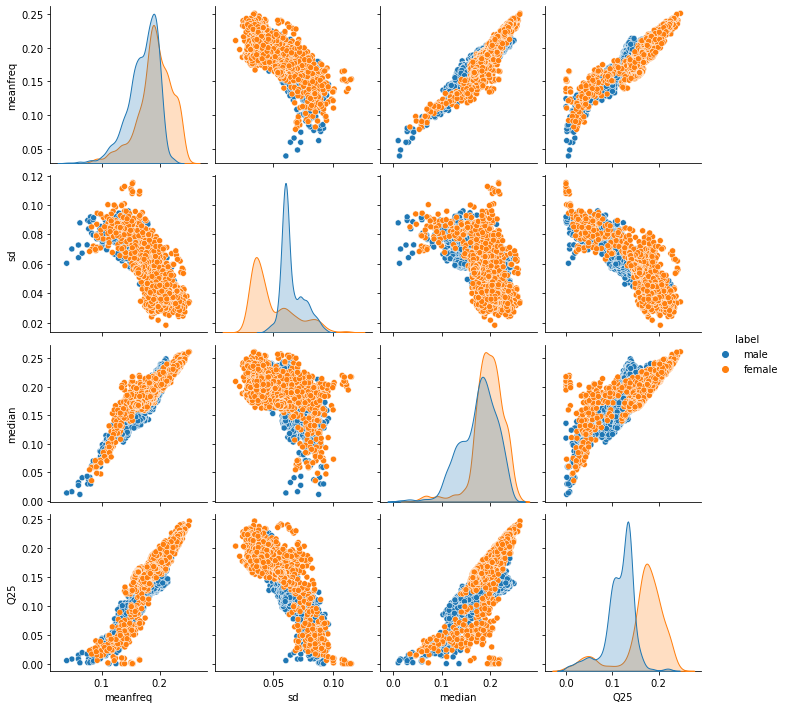

In [49]:
sns.pairplot(voice[['meanfreq','sd','median','Q25','label']], hue='label',diag_kws={'bw': 0.2})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

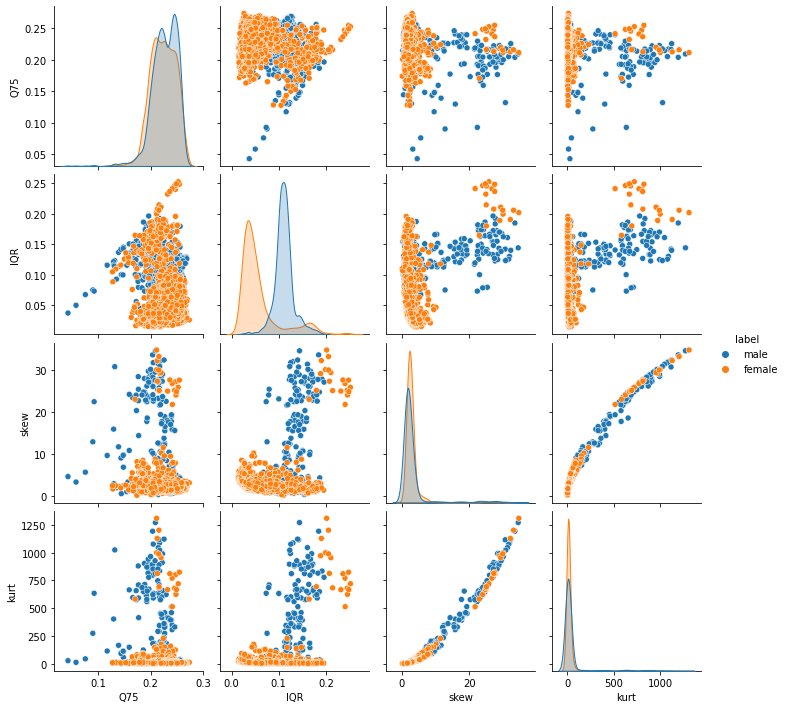

In [50]:
sns.pairplot(voice[['Q75','IQR','skew','kurt' ,'label']], hue='label',diag_kws={'bw': 0.2})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

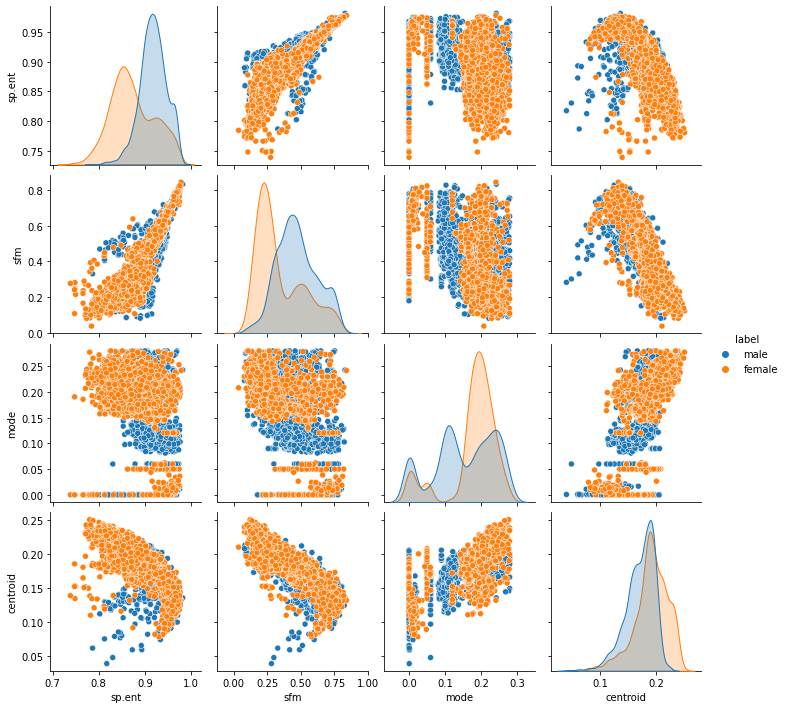

In [51]:
sns.pairplot(voice[['sp.ent','sfm','mode','centroid' ,'label']], hue='label',diag_kws={'bw': 0.2})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

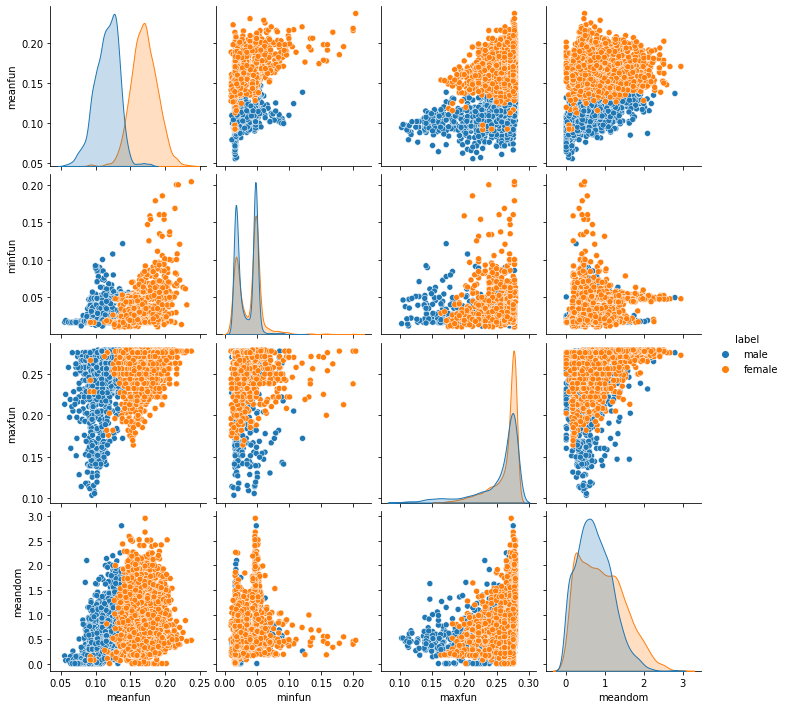

In [52]:
sns.pairplot(voice[['meanfun','minfun','maxfun','meandom','label']], hue='label',diag_kws={'bw': 0.2})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

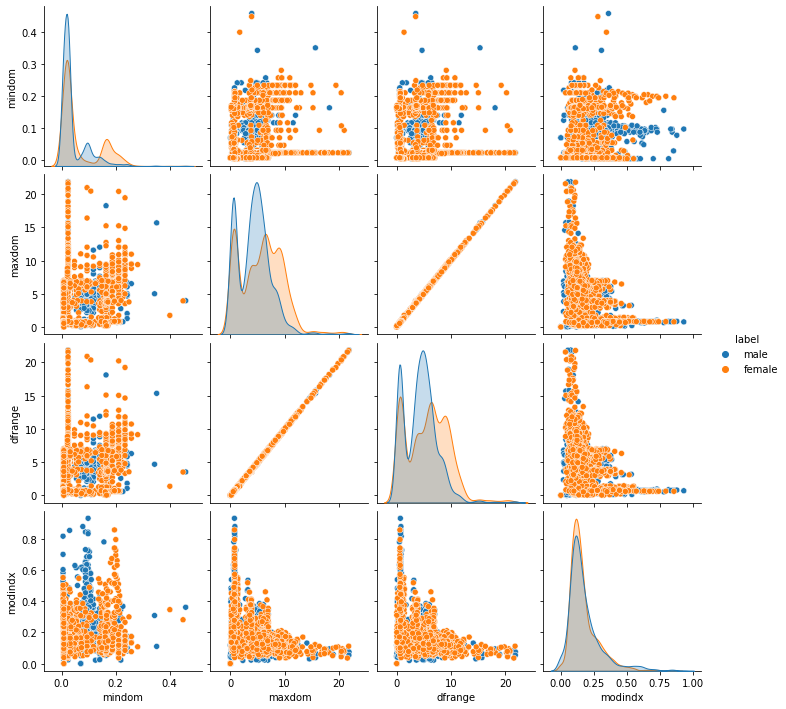

In [53]:
sns.pairplot(voice[['mindom','maxdom','dfrange','modindx','label']], hue='label',diag_kws={'bw': 0.2})

In [54]:
voice['label'].unique()

array(['male', 'female'], dtype=object)

In [55]:
voice['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

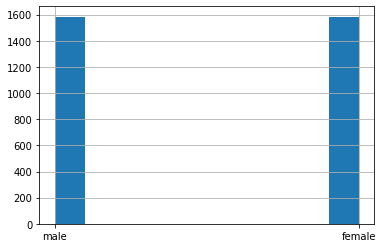

In [56]:
voice['label'].hist()


this figure shows that the number of a male voice record is equal to a female voice record

#Tidying the data

In [57]:
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [58]:
voice[(voice['meanfreq'] == 0.0000 ) | (voice['sd'] == 0.0000 ) |(voice['median'] == 0.0000)
     |(voice['Q25'] == 0.0000 )|(voice['Q75'] == 0.0000 )|(voice['IQR'] == 0.0000 )
     |(voice['skew'] == 0.0000 )|(voice['kurt'] == 0.0000 )|(voice['sp.ent'] == 0.0000 )
     |(voice['sfm'] == 0.0000)|(voice['mode'] == 0.0000 )|(voice['centroid'] == 0.0000 )
     |(voice['meanfun'] == 0.0000 )|(voice['minfun'] == 0.0000 )|(voice['maxfun'] == 0.0000)
     |(voice['meandom'] == 0.0000 )|(voice['mindom']== 0.0000 )|(voice['maxdom']== 0.0000 )
     |(voice['dfrange']== 0.0000 )|(voice['modindx']== 0.0000 )|(voice['label']== 0.0000 )]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.0,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.0,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
73,0.200830,0.053066,0.210059,0.185332,0.236198,0.050866,1.840901,6.006801,0.907683,0.386818,0.0,0.200830,0.165155,0.015764,0.271186,1.067057,0.070312,5.593750,5.523438,0.336376,male
75,0.190325,0.051696,0.191410,0.156900,0.220584,0.063685,1.461859,5.360319,0.918001,0.362344,0.0,0.190325,0.152013,0.021136,0.246154,0.884549,0.007812,6.718750,6.710938,0.211735,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,0.134838,0.100239,0.202387,0.009745,0.215438,0.205693,29.969000,989.215323,0.785192,0.360357,0.0,0.134838,0.162348,0.017957,0.271186,0.007812,0.007812,0.007812,0.000000,0.000000,female
2956,0.132350,0.092796,0.150634,0.036282,0.216193,0.179911,25.115811,693.730091,0.866899,0.591102,0.0,0.132350,0.153273,0.016260,0.266667,0.007812,0.007812,0.007812,0.000000,0.000000,female
2957,0.121456,0.099999,0.159258,0.005410,0.212921,0.207512,27.297721,813.070634,0.790010,0.405432,0.0,0.121456,0.152380,0.016097,0.262295,0.007812,0.007812,0.007812,0.000000,0.000000,female
2958,0.134325,0.099657,0.198358,0.010187,0.215821,0.205634,33.167300,1202.684552,0.796780,0.384270,0.0,0.134325,0.156510,0.016113,0.275862,0.023290,0.007812,0.828125,0.820312,0.038462,female


so as we see the data is perfect ,but there are many zeros data all of them for males and when we drop them male examples will be less than female

##Drop Zeros

In [59]:
voice.drop(voice[(voice['meanfreq'] == 0.0000 ) | (voice['sd'] == 0.0000 ) |(voice['median'] == 0.0000)
     |(voice['Q25'] == 0.0000 )|(voice['Q75'] == 0.0000 )|(voice['IQR'] == 0.0000 )
     |(voice['skew'] == 0.0000 )|(voice['kurt'] == 0.0000 )|(voice['sp.ent'] == 0.0000 )
     |(voice['sfm'] == 0.0000)|(voice['mode'] == 0.0000 )|(voice['centroid'] == 0.0000 )
     |(voice['meanfun'] == 0.0000 )|(voice['minfun'] == 0.0000 )|(voice['maxfun'] == 0.0000)
     |(voice['meandom'] == 0.0000 )|(voice['mindom']== 0.0000 )|(voice['maxdom']== 0.0000 )
     |(voice['dfrange']== 0.0000 )|(voice['modindx']== 0.0000 )|(voice['label']== 0.0000 )].index , inplace = True)

In [61]:
voice['label'].value_counts()

female    1508
male      1420
Name: label, dtype: int64

the result of drop is male recordes (1420) less than female records (1508)

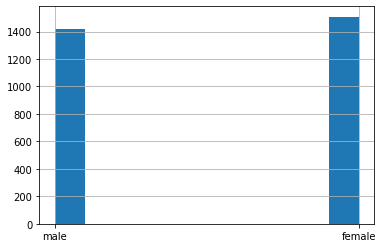

In [62]:
voice['label'].hist()

We need to mapping class feature wich name is label, in mapping we replaced male with 1 and female with 0

In [63]:
mapdec={'male':1,'female':0}
voice['labelnew']=voice['label'].map(mapdec)

In [64]:
assert len(voice['label'].unique()) == 2

In [65]:
voice.to_csv('voice-clean.csv', index=False)

#Drop Highly Correlated Features

In [66]:
clnvoice= pd.read_csv('voice-clean.csv')

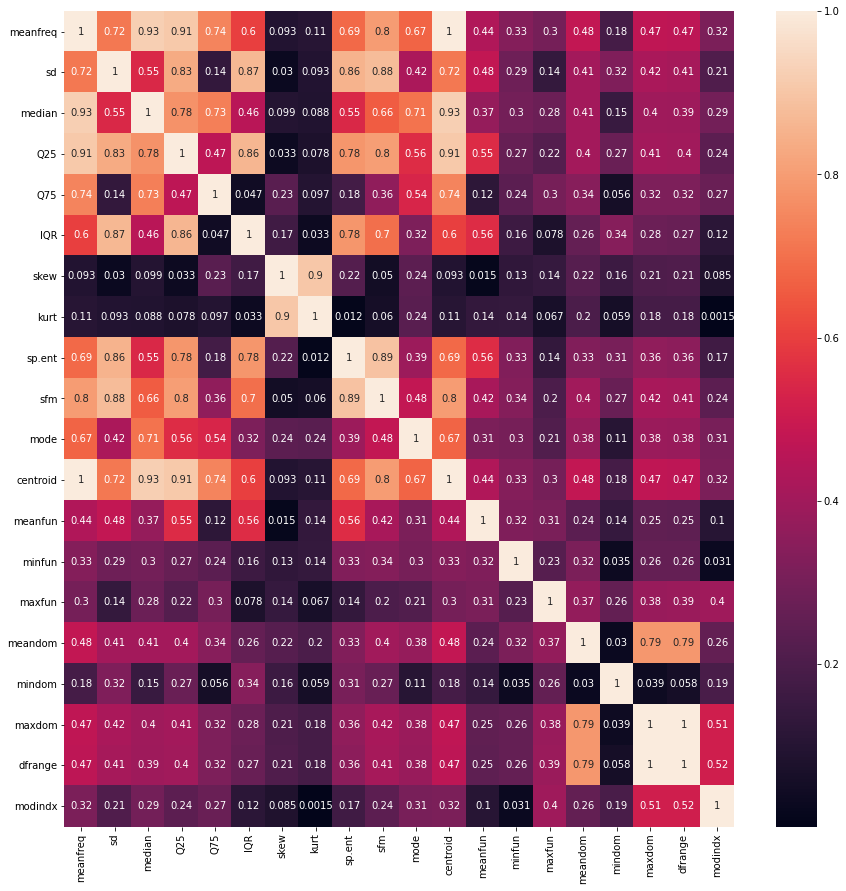

In [67]:
column=clnvoice.columns[:-1:]
cor_matrix = clnvoice[column].corr().abs()
fig=plt.figure(figsize=(15,15))
sns.heatmap(cor_matrix,annot=True)

According to the above figure, we have many features that have a strong correlation with other features, which means that the values of these properties are approximately equal, which means that they do not affect the results and may reduce  accuracy sometimes, so we often delete few of them.

In [68]:
upper_tri = abs(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.900000)]
print(20-len(to_drop))


15


After deleting a group of features based on their correlation, the sum of what remains of our features is 15 out of 20

In [69]:
voice1 = clnvoice.drop(clnvoice[to_drop], axis=1)

In [70]:
voice1.drop('label', axis=1,inplace=True)

In [71]:
voice1.head(3)

,meanfreq,sd,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,labelnew
0,0.151228,0.072111,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,1
1,0.135120,0.079146,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,1
2,0.132786,0.079557,0.209592,0.141634,1.932562,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,0.125160,1


#Standard Scaler

In [131]:
all_inputs = voice1[voice1.columns.drop('labelnew')]
all_labels = voice1['labelnew'].values

In [132]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.30, random_state=111)

In [133]:
sc =StandardScaler()
training_inputs = sc.fit_transform(training_inputs)
testing_inputs = sc.transform(testing_inputs)

# classification


##DecisionTree

eee

In [108]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier( criterion='entropy',class_weight='balanced',random_state=43)
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
print('decision_tree_classifier.score =',decision_tree_classifier.score(testing_inputs, testing_classes))

decision_tree_classifier.score = 0.9726962457337884


In [109]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier( criterion='gini',class_weight='balanced',random_state=43)
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
print('decision_tree_classifier.score =',decision_tree_classifier.score(testing_inputs, testing_classes))

decision_tree_classifier.score = 0.9579067121729238


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


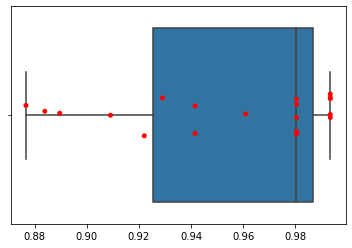

In [ ]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=19)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='r')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


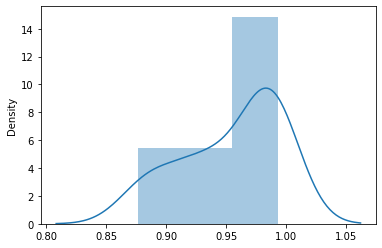

In [ ]:
sns.distplot(dt_scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


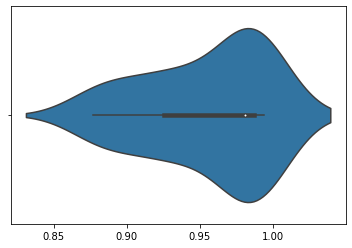

In [ ]:
sns.violinplot(dt_scores)

##RandomForest

eeeee

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(bootstrap=True ,class_weight='balanced',criterion='entropy',random_state=42 )

print(random_forest_classifier.fit(training_inputs,training_classes))
print(random_forest_classifier.score(testing_inputs,testing_classes))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
0.981797497155859


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight='balanced',criterion='gini',random_state=42)

print(random_forest_classifier.fit(training_inputs,training_classes))
print(random_forest_classifier.score(testing_inputs,testing_classes))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
0.9806598407281001


##GridSearch

eeeee

###Optimizers

In [ ]:
dflist = []

optimizers = ['SGD(lr=0.5)',
              'Adam(lr=0.5)',
              'Adagrad(lr=0.5)',
              'RMSprop(lr=0.5)',]
for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(15,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(training_inputs, training_classes, batch_size=20, epochs=140, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx





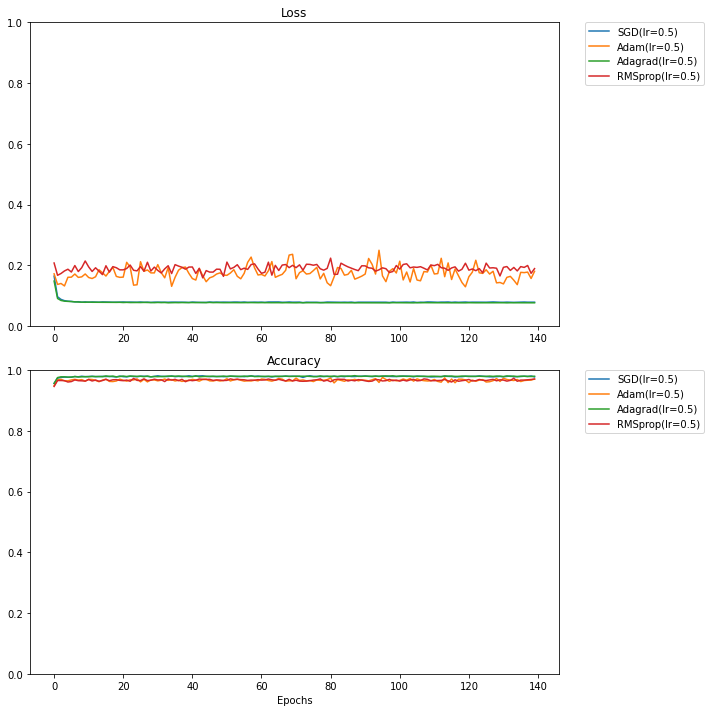

In [ ]:
mpl.rc('figure', figsize=(10, 10))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

###Learning Rates

In [ ]:
dflist = []

optimizers = ['Adagrad(lr=0.05)',
              'Adagrad(lr=0.01)',
              'Adagrad(lr=0.1)',
              'Adagrad(lr=0.2)',
              'Adagrad(lr=0.5)',
              'Adagrad(lr=0.8)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(15,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(training_inputs, training_classes, batch_size=30, epochs=140, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

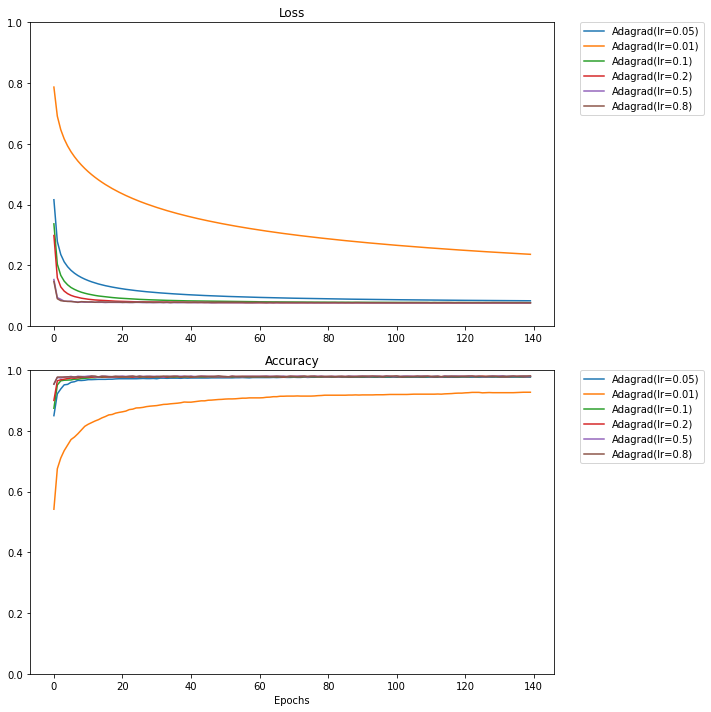

In [ ]:
mpl.rc('figure', figsize=(10, 10))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

###Batch Sizes

In [ ]:
dflist = []

batch_sizes = [2,3,7,10,11,15,20,25,30]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(15,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='Adagrad',
                  metrics=['accuracy'])
    h = model.fit(training_inputs, training_classes, batch_size=batch_size, verbose=0,epochs=160)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

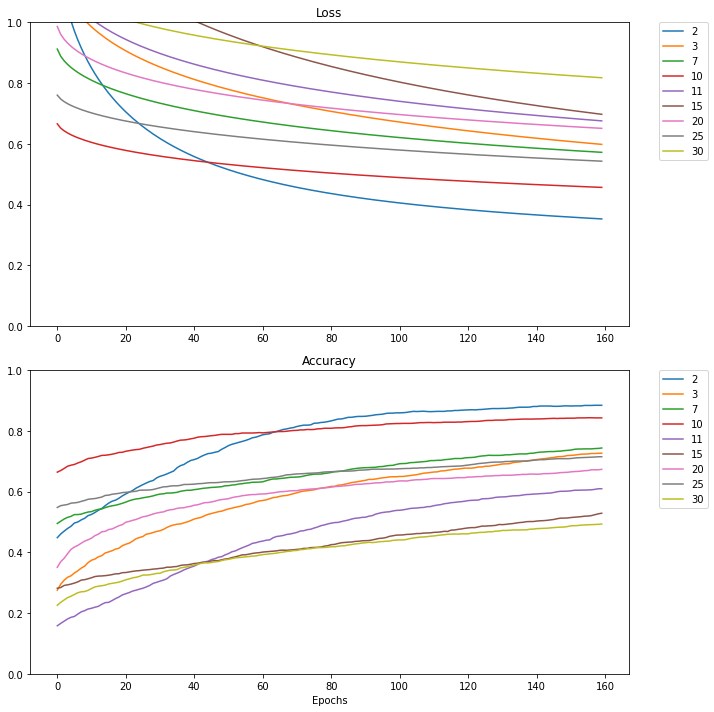

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

###Initialization

In [ ]:
dflist = []
initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform','glorot_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(15,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adagrad(lr=0.5),
                  metrics=['accuracy'])

    h = model.fit(training_inputs, training_classes, batch_size=7, epochs=140, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

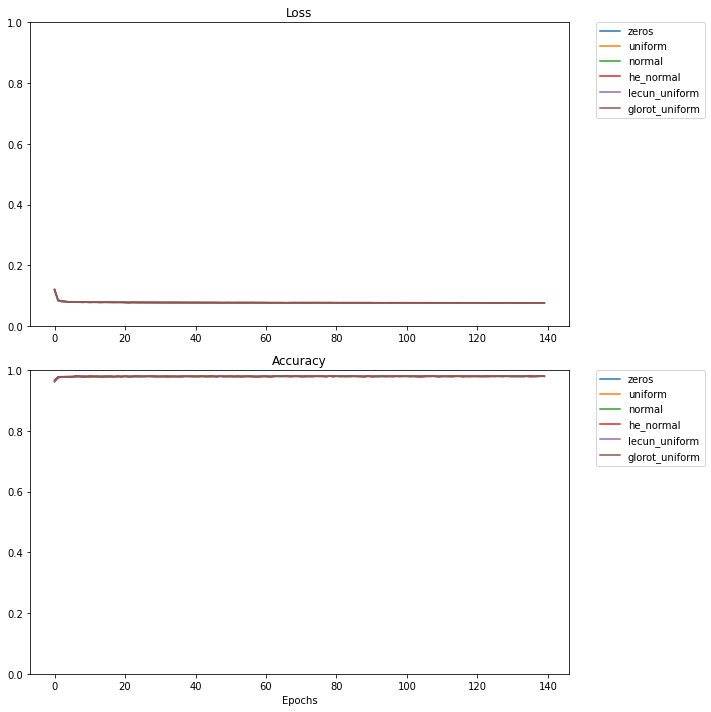

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

###Logistic Regression Model

eeeee

In [ ]:
del model
model = Sequential()
model.add(Dense(2,kernel_initializer='lecun_uniform' , input_shape=(15,), activation='sigmoid'))
model.add(Dense(2,kernel_initializer='lecun_uniform' , activation='sigmoid'))
model.add(Dense(1,kernel_initializer='lecun_uniform' ,  activation='sigmoid'))
model.compile(Adagrad(lr=0.8), 'binary_crossentropy', metrics=['accuracy'])
model.fit(training_inputs, training_classes,batch_size=11, epochs=160, verbose=0,shuffle=False )
model.evaluate(testing_inputs,testing_classes)

28/28 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9772


[0.08714830875396729, 0.977246880531311]

##Confusion Matrix 

eeeeee

In [134]:
models = []
models.append(('LR', LogisticRegression(random_state=42,solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LRCV', LogisticRegressionCV(solver='liblinear' )))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=12,
                                              random_state=42, splitter='best')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=111)))

In [135]:
results = []
names = []
seed=4
for name, model in models:
    kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, training_inputs, training_classes, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}, {cv_results.mean()}, {cv_results.std()}))")

LR, 0.9760875182392996, 0.005318095013288246))
LDA, 0.9716910870622568, 0.008463912052400498))
LRCV, 0.9755992369892996, 0.005770780927570658))
KNN, 0.9741362931663424, 0.008927965399495157))
CART, 0.973154030885214, 0.006898194238741067))
NB, 0.9292315175097277, 0.00986547211143056))
SVM, 0.9843825997081712, 0.005524308319957352))


In [144]:
cls = SVC(class_weight='balanced',random_state=111)
cls.fit(training_inputs,training_classes)
label_pred = cls.predict(testing_inputs)
print('--------------------------------------------------------')

print("------- Accuracy --------\n")
print(accuracy_score(testing_classes,label_pred))
print('--------------------------------------------------------')

print("------- Confusion Matrix --------\n")

print(confusion_matrix(testing_classes,label_pred))

print('--------------------------------------------------------')


print("------- Classifcation Report-------- \n")


print(classification_report(testing_classes,label_pred))

print('--------------------------------------------------------')

--------------------------------------------------------
------- Accuracy --------

0.9795221843003413
--------------------------------------------------------
------- Confusion Matrix --------

[[442   6]
 [ 12 419]]
--------------------------------------------------------
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       448
           1       0.99      0.97      0.98       431

    accuracy                           0.98       879
   macro avg       0.98      0.98      0.98       879
weighted avg       0.98      0.98      0.98       879

--------------------------------------------------------


##neuralnetwork algorethm

eeeeeee

eeeeee

In [121]:
perceptron= Perceptron(shuffle=True,random_state=55,class_weight='balanced')
perceptron.fit(training_inputs,training_classes)
perceptron.score(training_inputs,training_classes)

0.9790141532454856

In [122]:
y=perceptron.predict(testing_inputs)
accuracy_score(testing_classes,y)

0.9738339021615472

eeeeee

In [123]:
mlp= MLPClassifier(hidden_layer_sizes=53, activation='relu', solver='sgd',
                   batch_size='auto', learning_rate='adaptive', learning_rate_init=0.005, power_t='invscaling',
                   shuffle=True, random_state=1, tol=0.0001)
mlp.fit(training_inputs,training_classes)
print(mlp.score(training_inputs,training_classes))
y=mlp.predict(testing_inputs)

print(accuracy_score(testing_classes,y))

0.9751098096632503
0.9726962457337884


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
cls = MLPClassifier(hidden_layer_sizes=53, activation='relu', solver='sgd',
                   batch_size='auto', learning_rate='adaptive', learning_rate_init=0.005, power_t='invscaling',
                   shuffle=True, random_state=1, tol=0.0001)
cls.fit(training_inputs,training_classes)
label_pred = cls.predict(testing_inputs)
print('--------------------------------------------------------')

print("------- Accuracy --------\n")
print(accuracy_score(testing_classes,label_pred))
print('--------------------------------------------------------')

print("------- Confusion Matrix --------\n")

print(confusion_matrix(testing_classes,label_pred))

print('--------------------------------------------------------')


print("------- Classifcation Report-------- \n")


print(classification_report(testing_classes,label_pred))


--------------------------------------------------------
------- Accuracy --------

0.981797497155859
--------------------------------------------------------
------- Confusion Matrix --------

[[443   5]
 [ 11 420]]
--------------------------------------------------------
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       448
           1       0.99      0.97      0.98       431

    accuracy                           0.98       879
   macro avg       0.98      0.98      0.98       879
weighted avg       0.98      0.98      0.98       879



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#Reproducibility

In [ ]:
!pip install watermark

In [ ]:
%load_ext watermark

In [ ]:
%watermark -a 'Anwar_Abbass' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Author: Anwar_Abbass

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.12.0

numpy     : 1.18.1
pandas    : 1.0.1
sklearn   : 0.22.1
matplotlib: 3.1.3
seaborn   : 0.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
CPU cores   : 4
Architecture: 64bit

